In [1]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import JSON
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print("Metadata:")
display(JSON(default_of_credit_card_clients.metadata))
  
# variable information 
print("Variable Information:")
print(default_of_credit_card_clients.variables)

Metadata:
{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive ac

In [13]:
from IPython.display import JSON
import pprint

pprint.pprint(default_of_credit_card_clients.metadata)

{'abstract': "This research aimed at the case of customers' default payments "
             'in Taiwan and compares the predictive accuracy of probability of '
             'default among six data mining methods.',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': "This research aimed at the case of customers' "
                                'default payments in Taiwan and compares the '
                                'predictive accuracy of probability of default '
                                'among six data mining methods. From the '
                                'perspective of risk management, the result of '
                                'predictive accuracy of the estima

In [79]:
print(default_of_credit_card_clients.metadata['additional_info']['variable_info'])

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and

In [2]:
from IPython.display import Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
Markdown(
    f"""
# Conducting EDA on UCI ML Repo Dataset: Default of Credit Card Clients Dataset

## Type of Data:

- **Tabular Data**: The dataset consists of rows and columns, where each row represents a credit card client and each column represents a feature or attribute of the client.

## Number of Instances and Features:

- **Instances**: {X.shape[0]} credit card clients.
- **Features**: {X.shape[1]} attributes/features per client.

## Target Variable:

- **Default Payment Next Month**: A binary variable indicating whether the client defaulted on their credit card payment the following month (1 = default, 0 = no default).

"""
)


# Conducting EDA on UCI ML Repo Dataset: Default of Credit Card Clients Dataset

## Type of Data:

- **Tabular Data**: The dataset consists of rows and columns, where each row represents a credit card client and each column represents a feature or attribute of the client.

## Number of Instances and Features:

- **Instances**: 30000 credit card clients.
- **Features**: 23 attributes/features per client.

## Target Variable:

- **Default Payment Next Month**: A binary variable indicating whether the client defaulted on their credit card payment the following month (1 = default, 0 = no default).



In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
X.columns = ["LIMIT_BAL",	"SEX",	"EDUCATION",	"MARRIAGE",	"AGE",	"PAY_0",	"PAY_2",	"PAY_3",	"PAY_4",	"PAY_5",	"PAY_6",	"BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",	"PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6"]

In [9]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [10]:
X.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## About the data:

- Gender (1 = male; 2 = female)
- Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- Marital status (1 = married; 2 = single; 3 = others)

In [18]:
Markdown(
    f"""
### 1. DATA QUALITY:
- Total samples: {len(X)}
- Missing values: {X.isnull().sum().sum()}
- Duplicate rows: {X.duplicated().sum()}
"""
)


### 1. DATA QUALITY:
- Total samples: 30000
- Missing values: 0
- Duplicate rows: 56


In [43]:
y_dist = y.value_counts() / len(y) * 100
default_rate = y_dist[y_dist.index == np.int64(1)].iloc[0]

Markdown(f"""
### 2. TARGET VARIABLE:
- Default rate: {default_rate:.2f}%
- Class imbalance ratio: Yes vs No Ratio: {y_dist[y_dist.index == np.int64(1)].iloc[0]/y_dist[y_dist.index == np.int64(0)].iloc[0]:.2f}:1
- Recommendation: Address imbalance using SMOTE.
""")


### 2. TARGET VARIABLE:
- Default rate: 22.12%
- Class imbalance ratio: Yes vs No Ratio: 0.28:1
- Recommendation: Address imbalance using SMOTE.


In [77]:
print("\n1. DATA QUALITY:")
print(f"   - Total samples: {len(X)}")
print(f"   - Missing values: {X.isnull().sum().sum()}")
print(f"   - Duplicate rows: {X.duplicated().sum()}")

print("\n2. TARGET VARIABLE:")
default_rate = y['Y'].mean() * 100
print(f"   - Default rate: {default_rate:.2f}%")
print(f"   - Class imbalance ratio: {(1-y['Y'].mean())/y['Y'].mean():.2f}:1")
print("   - Recommendation: Consider using SMOTE or class weights")

print("\n3. MOST IMPORTANT FEATURES (by correlation with target):")
top_features = abs(target_corr).sort_values(ascending=False)[1:6]
for feat, corr in top_features.items():
    print(f"   - {feat}: {corr:.3f}")

print("\n4. POTENTIAL DATA ISSUES:")
# Check for unusual values in categorical variables
if len(X[X['EDUCATION'] == 0]) > 0:
    print(f"   - {len(X[X['EDUCATION'] == 0])} samples with EDUCATION=0 (unusual)")
if len(X[X['MARRIAGE'] == 0]) > 0:
    print(f"   - {len(X[X['MARRIAGE'] == 0])} samples with MARRIAGE=0 (unusual)")
    
print("\n5. FEATURE ENGINEERING OPPORTUNITIES:")
print("   - Payment delays count (num_delays)")
print("   - Payment to bill ratio")
print("   - Credit utilization rate")
print("   - Trend features from bill/payment history")
print("   - Aggregated payment status features")

print("\n6. MODELING CONSIDERATIONS:")
print("   - Address class imbalance")
print("   - Scale numerical features (wide range in bill/payment amounts)")
print("   - Encode categorical variables")
print("   - Consider polynomial features for payment history")
print("   - Test tree-based models (handle non-linearity well)")

print("\n" + "="*70)


1. DATA QUALITY:
   - Total samples: 30000
   - Missing values: 0
   - Duplicate rows: 56

2. TARGET VARIABLE:
   - Default rate: 22.12%
   - Class imbalance ratio: 3.52:1
   - Recommendation: Consider using SMOTE or class weights

3. MOST IMPORTANT FEATURES (by correlation with target):
   - PAY_0: 0.325
   - PAY_2: 0.264
   - PAY_3: 0.235
   - PAY_4: 0.217
   - PAY_5: 0.204

4. POTENTIAL DATA ISSUES:
   - 14 samples with EDUCATION=0 (unusual)
   - 54 samples with MARRIAGE=0 (unusual)

5. FEATURE ENGINEERING OPPORTUNITIES:
   - Payment delays count (num_delays)
   - Payment to bill ratio
   - Credit utilization rate
   - Trend features from bill/payment history
   - Aggregated payment status features

6. MODELING CONSIDERATIONS:
   - Address class imbalance
   - Scale numerical features (wide range in bill/payment amounts)
   - Encode categorical variables
   - Consider polynomial features for payment history
   - Test tree-based models (handle non-linearity well)



## 10. Key EDA Insights Summary

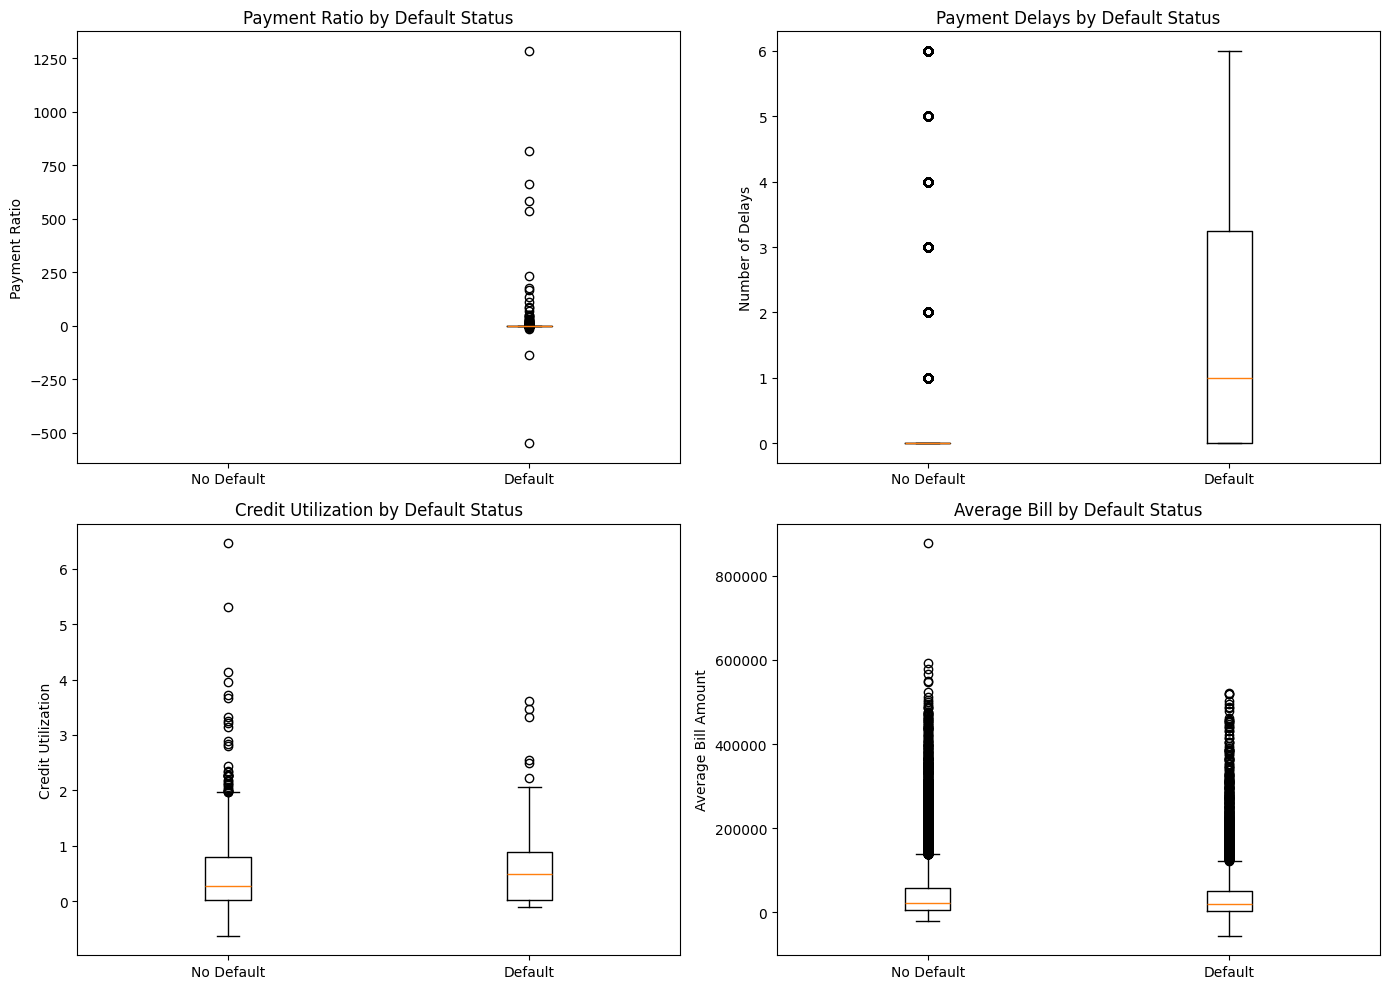

In [73]:
# Analyze derived features vs target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Payment ratio by default status
axes[0, 0].boxplot([
    data_analysis[data_analysis['Y'] == 0]['payment_ratio'],
    data_analysis[data_analysis['Y'] == 1]['payment_ratio']
])
axes[0, 0].set_xticklabels(['No Default', 'Default'])
axes[0, 0].set_ylabel('Payment Ratio')
axes[0, 0].set_title('Payment Ratio by Default Status')

# Number of delays by default status
axes[0, 1].boxplot([
    data_analysis[data_analysis['Y'] == 0]['num_delays'],
    data_analysis[data_analysis['Y'] == 1]['num_delays']
])
axes[0, 1].set_xticklabels(['No Default', 'Default'])
axes[0, 1].set_ylabel('Number of Delays')
axes[0, 1].set_title('Payment Delays by Default Status')

# Credit utilization by default status
axes[1, 0].boxplot([
    data_analysis[data_analysis['Y'] == 0]['credit_utilization'],
    data_analysis[data_analysis['Y'] == 1]['credit_utilization']
])
axes[1, 0].set_xticklabels(['No Default', 'Default'])
axes[1, 0].set_ylabel('Credit Utilization')
axes[1, 0].set_title('Credit Utilization by Default Status')

# Average bill by default status
axes[1, 1].boxplot([
    data_analysis[data_analysis['Y'] == 0]['avg_bill'],
    data_analysis[data_analysis['Y'] == 1]['avg_bill']
])
axes[1, 1].set_xticklabels(['No Default', 'Default'])
axes[1, 1].set_ylabel('Average Bill Amount')
axes[1, 1].set_title('Average Bill by Default Status')

plt.tight_layout()
plt.show()

In [72]:
# Create some useful derived features for analysis
data_analysis = X.copy()

# Average bill amount
data_analysis['avg_bill'] = data_analysis[bill_cols].mean(axis=1)

# Average payment amount
data_analysis['avg_payment'] = data_analysis[pay_cols].mean(axis=1)

# Payment to bill ratio
data_analysis['payment_ratio'] = data_analysis['avg_payment'] / (data_analysis['avg_bill'] + 1)

# Number of times payment was delayed (PAY_X > 0)
data_analysis['num_delays'] = (data_analysis[payment_cols] > 0).sum(axis=1)

# Credit utilization (bill to limit ratio)
data_analysis['credit_utilization'] = data_analysis['BILL_AMT1'] / (data_analysis['LIMIT_BAL'] + 1)

data_analysis['Y'] = y['Y']

print("Derived Features Statistics:")
print(data_analysis[['avg_bill', 'avg_payment', 'payment_ratio', 'num_delays', 'credit_utilization']].describe())

Derived Features Statistics:
            avg_bill    avg_payment  payment_ratio    num_delays  \
count   30000.000000   30000.000000   29998.000000  30000.000000   
mean    44976.945200    5275.232094       3.765960      0.834200   
std     63260.721860   10137.946323     209.650970      1.554303   
min    -56043.166667       0.000000   -1502.000000      0.000000   
25%      4781.333333    1113.291667       0.041074      0.000000   
50%     21051.833333    2397.166667       0.086201      0.000000   
75%     57104.416667    5583.916667       0.598093      1.000000   
max    877313.833333  627344.333333   27000.000000      6.000000   

       credit_utilization  
count        30000.000000  
mean             0.423764  
std              0.411454  
min             -0.619890  
25%              0.022031  
50%              0.313991  
75%              0.829821  
max              6.454977  


## 9. Feature Engineering Insights

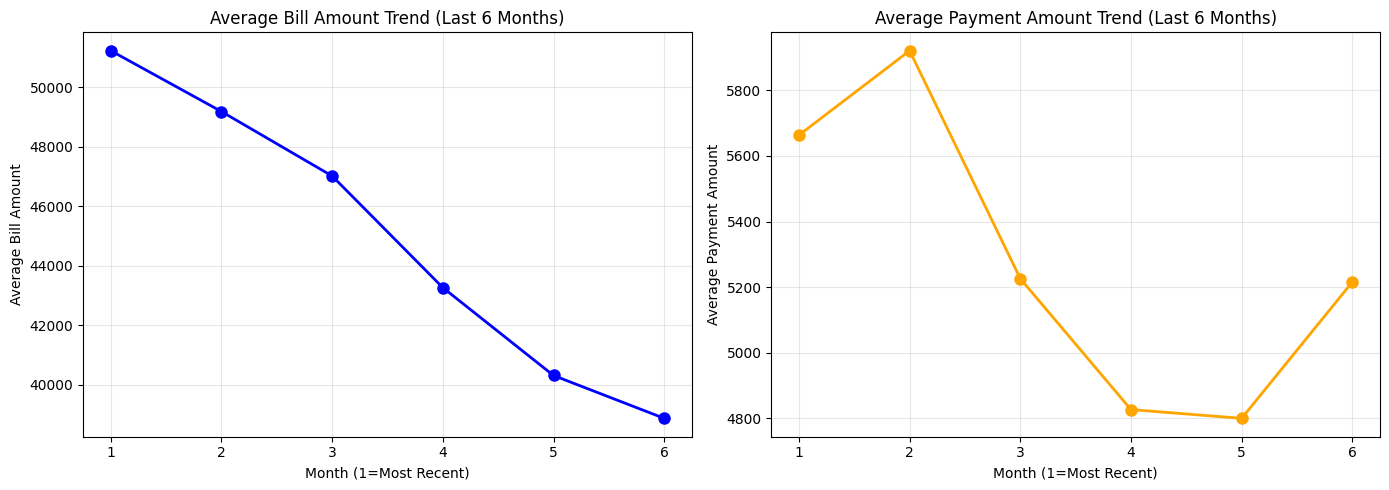

In [67]:
# Analyze bill and payment amounts over time
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Average bill and payment amounts
avg_bills = X[bill_cols].mean()
avg_payments = X[pay_cols].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bill amounts trend
axes[0].plot(range(1, 7), avg_bills, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_title('Average Bill Amount Trend (Last 6 Months)', fontsize=12)
axes[0].set_xlabel('Month (1=Most Recent)')
axes[0].set_ylabel('Average Bill Amount')
axes[0].grid(True, alpha=0.3)

# Payment amounts trend
axes[1].plot(range(1, 7), avg_payments, marker='o', linewidth=2, markersize=8, color='orange')
axes[1].set_title('Average Payment Amount Trend (Last 6 Months)', fontsize=12)
axes[1].set_xlabel('Month (1=Most Recent)')
axes[1].set_ylabel('Average Payment Amount')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Bill Amount and Payment Amount Trends

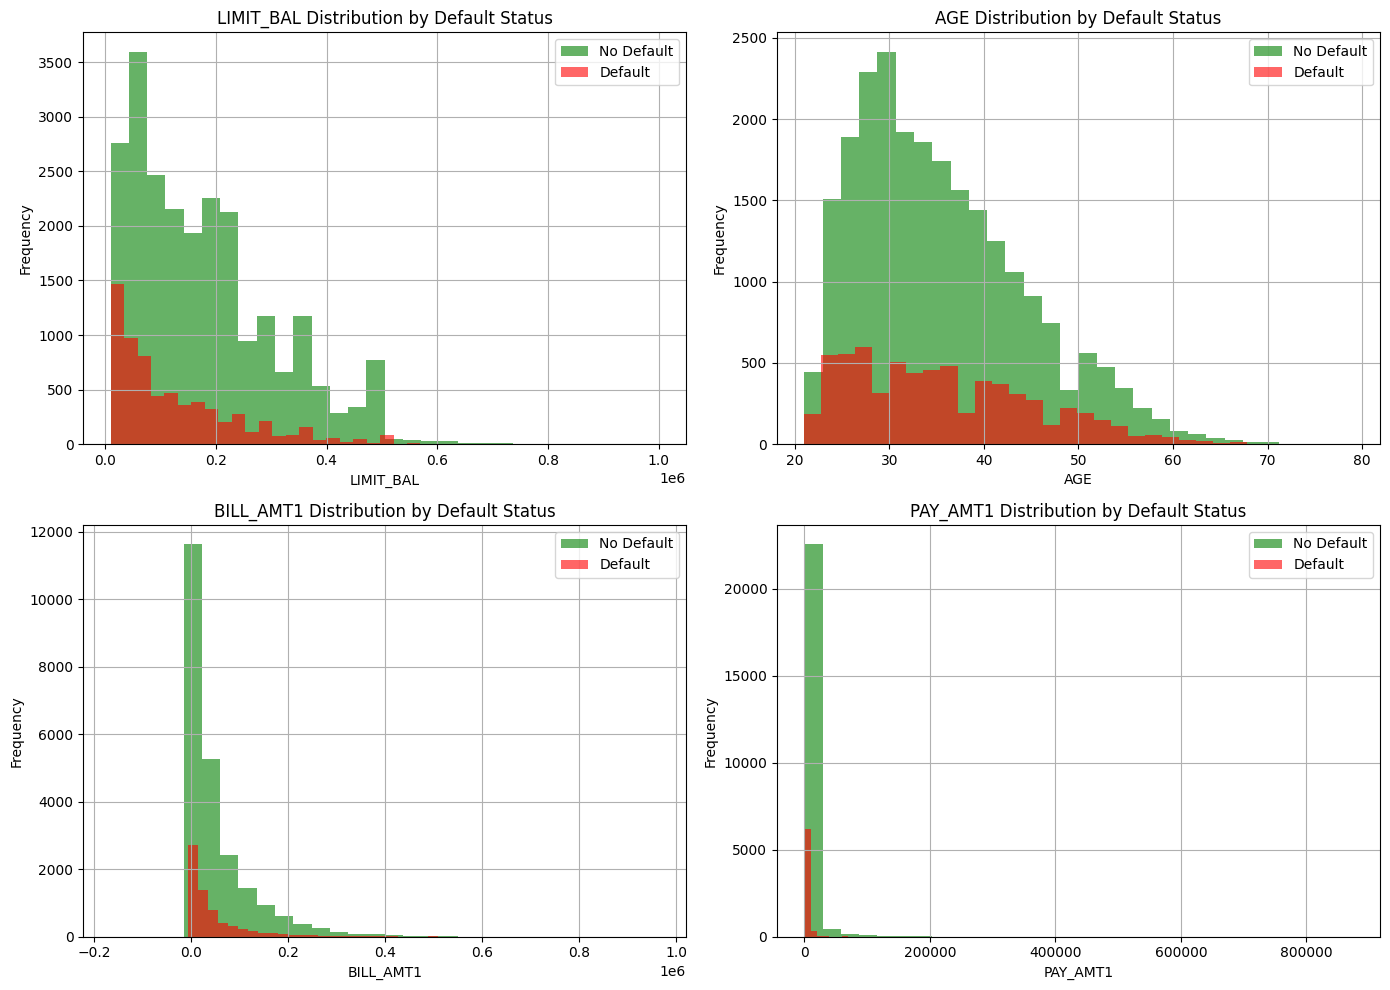

In [78]:
# Numerical features distribution by target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

data = X.copy()
data['default payment next month'] = y['Y']

for idx, col in enumerate(["LIMIT_BAL", "AGE", "BILL_AMT1", "PAY_AMT1"]):
    data[data["default payment next month"] == 0][col].hist(
        ax=axes[idx],
        bins=30,
        alpha=0.6,
        label="No Default",
        color="green",
    )
    data[data["default payment next month"] == 1][col].hist(
        ax=axes[idx],
        bins=30,
        alpha=0.6,
        label="Default",
        color="red",
    )
    axes[idx].set_title(f"{col} Distribution by Default Status")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")
    axes[idx].legend()

plt.tight_layout()
plt.show()

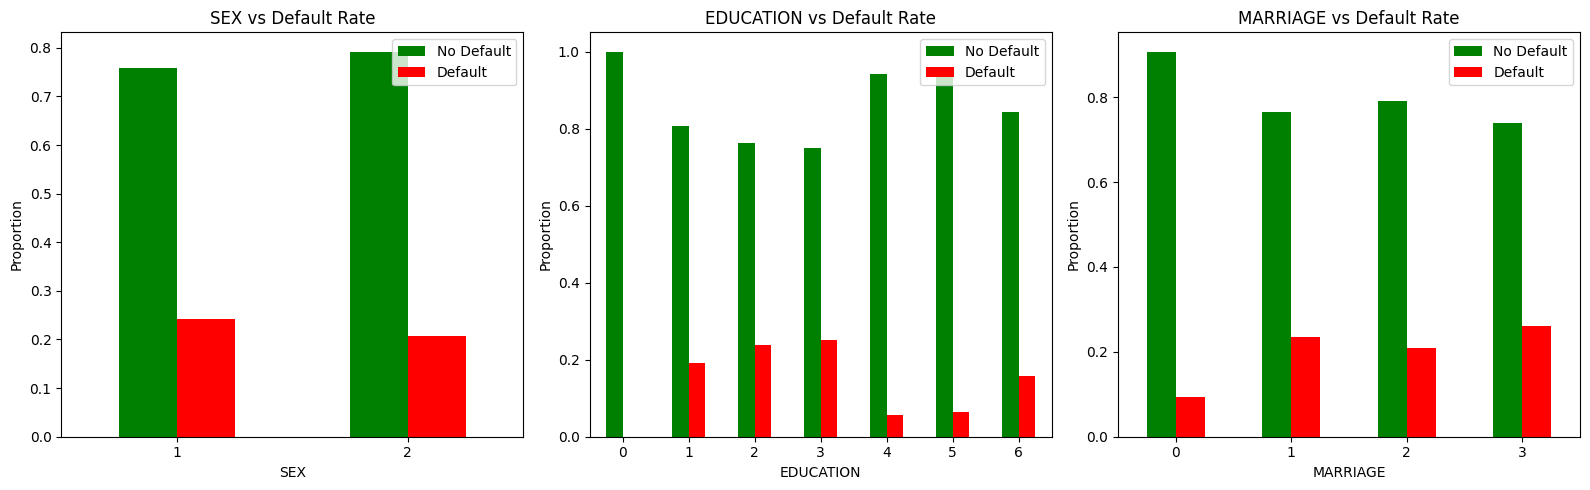

In [63]:
# Categorical features vs Target
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(["SEX", "EDUCATION", "MARRIAGE"]):
    pd.crosstab(X[col], y.Y, normalize="index").plot(
        kind="bar",
        ax=axes[idx],
        stacked=False,
        color=["green", "red"],
    )
    axes[idx].set_title(f"{col} vs Default Rate")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Proportion")
    axes[idx].legend(["No Default", "Default"])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 7. Bivariate Analysis: Features vs Target

Correlation with Target Variable (Default Payment):
Y            1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.028006
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: Y, dtype: float64


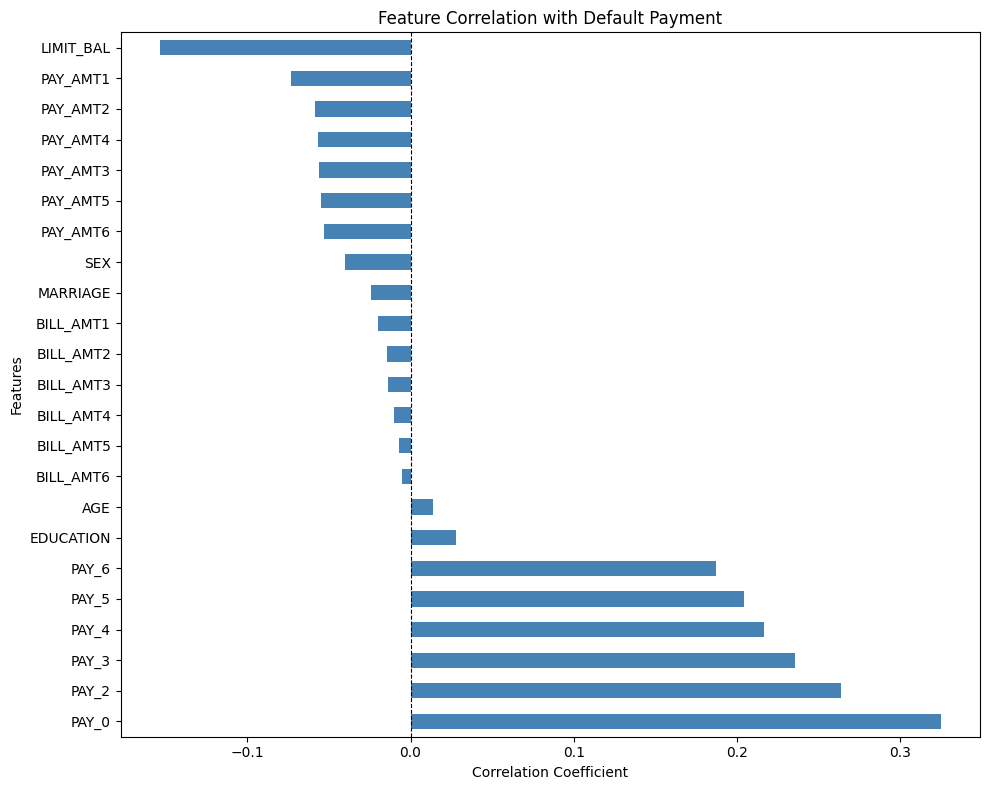

In [57]:
# Correlation with target variable
target_corr = correlation_matrix['Y'].sort_values(ascending=False)
print("Correlation with Target Variable (Default Payment):")
print(target_corr)

# Visualize top correlations with target
plt.figure(figsize=(10, 8))
target_corr.drop('Y').plot(kind='barh', color='steelblue')
plt.title('Feature Correlation with Default Payment')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

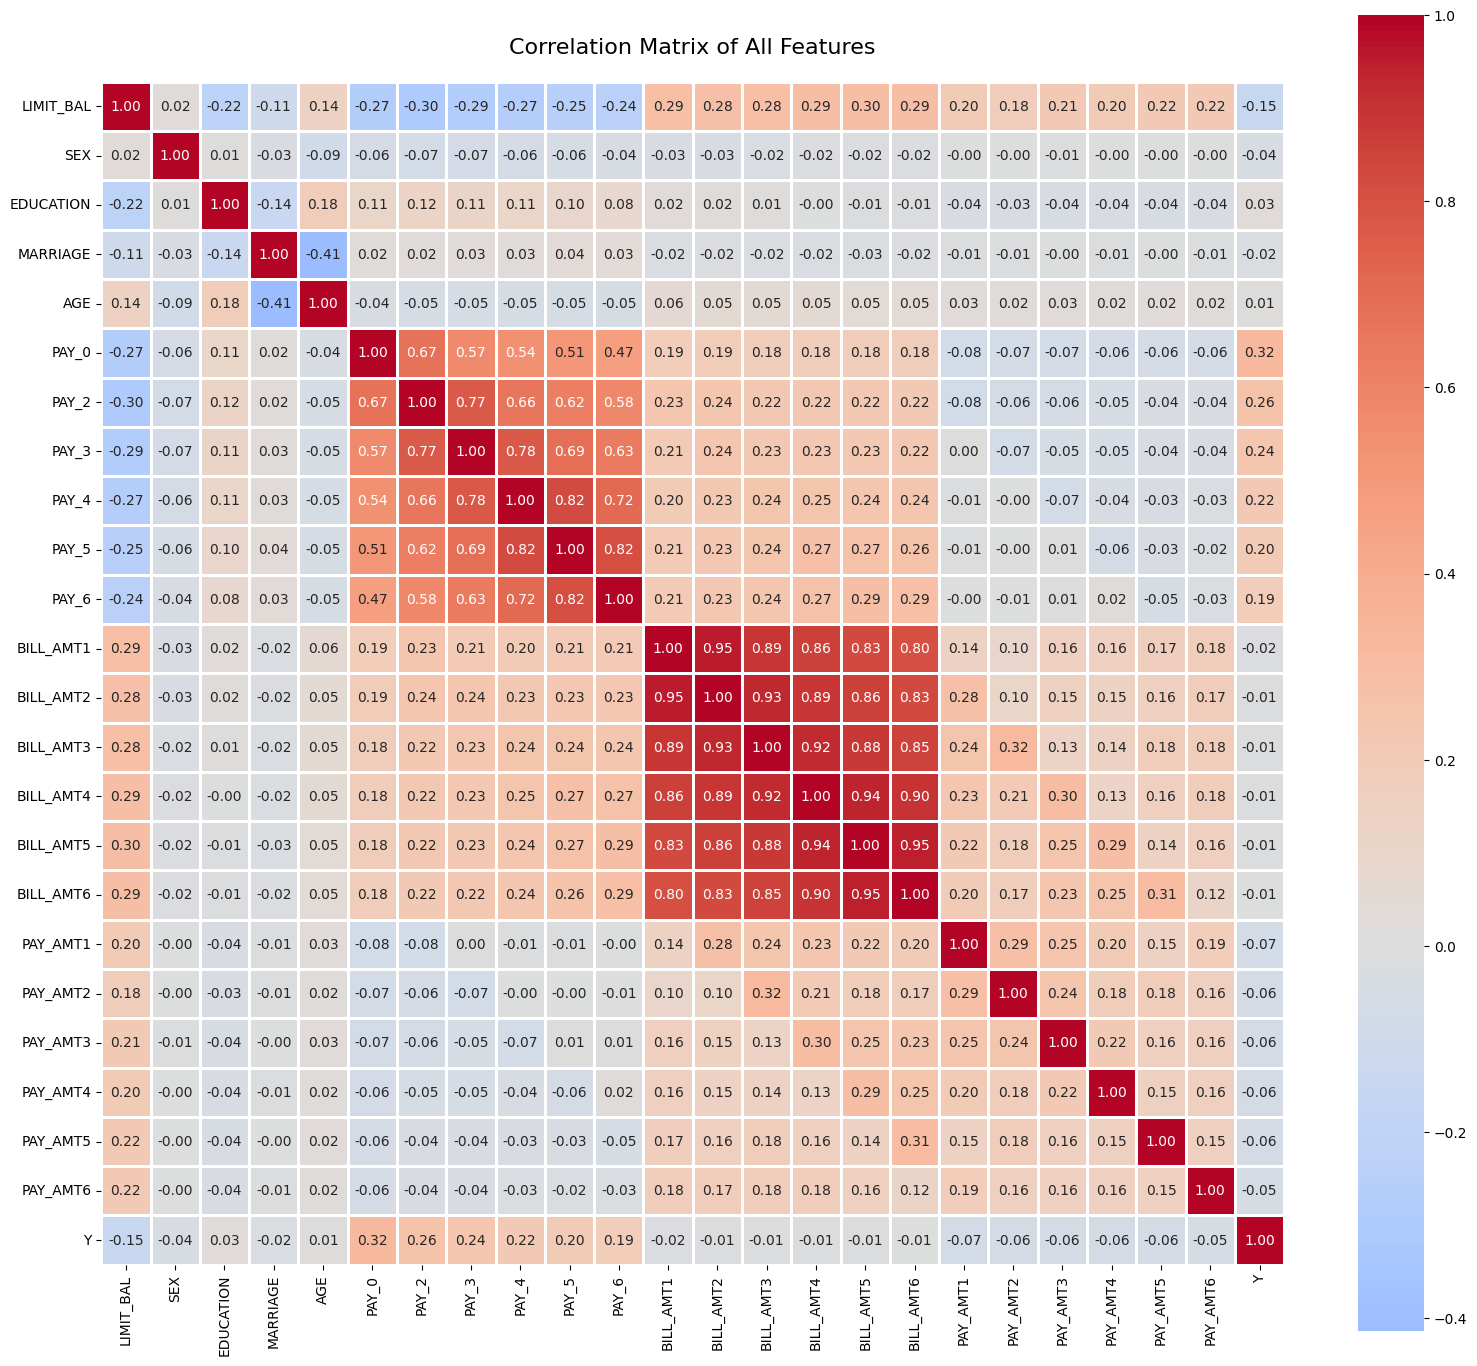

In [55]:
# Combine X and y for correlation analysis
data = pd.concat([X, y], axis=1)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of All Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

Payment Status Distribution:

PAY_0:
PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

PAY_2:
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

PAY_3:
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64

PAY_4:
PAY_4
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: count, dtype: int64

PAY_5:
PAY_5
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: count, dtype: int64

PAY_6:
PAY_6
-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 

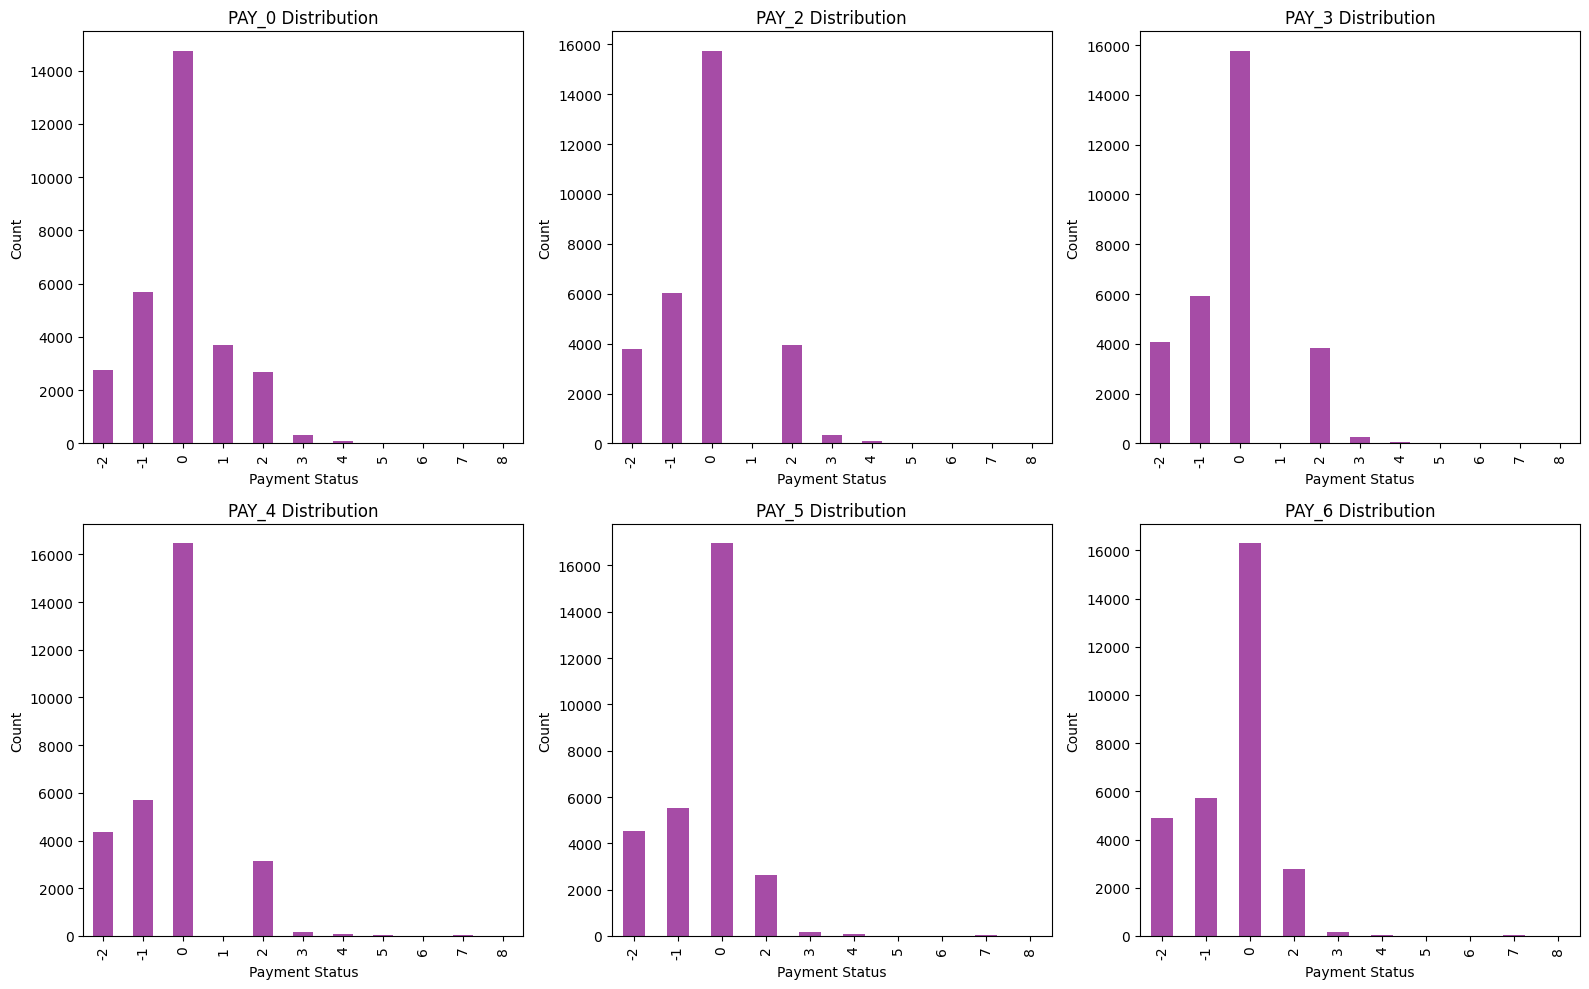

In [54]:
# Analyze payment status features
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

print("Payment Status Distribution:")
for col in payment_cols:
    print(f"\n{col}:")
    print(X[col].value_counts().sort_index())
    
# Visualize payment status
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(payment_cols):
    X[col].value_counts().sort_index().plot(kind='bar', ax=axes[idx], color='purple', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel('Payment Status')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 5. Payment History Analysis (PAY_0 to PAY_6)

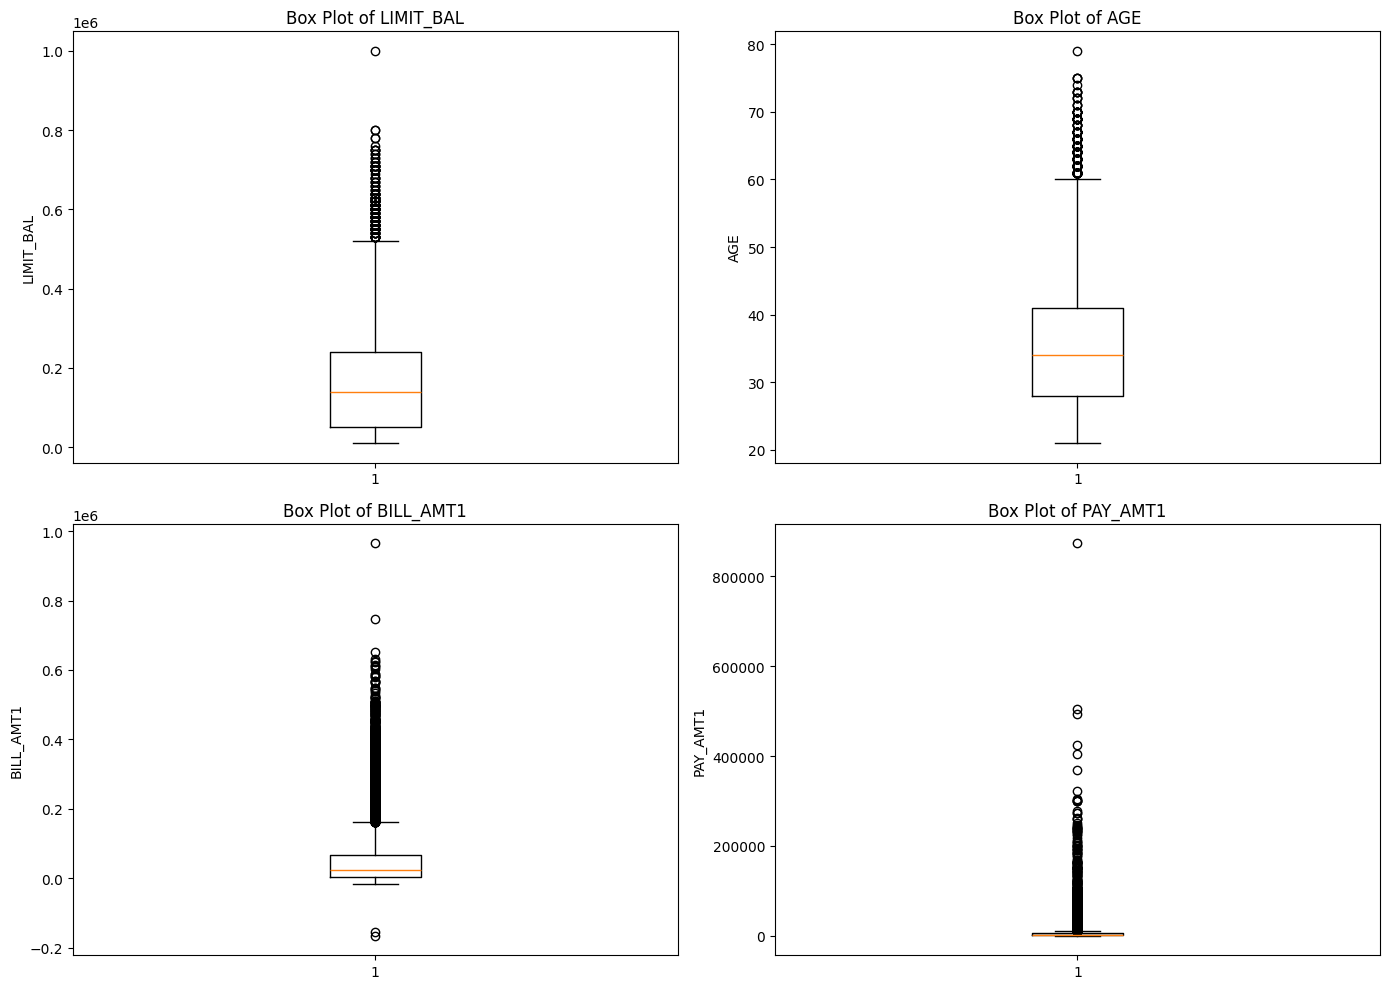


Detailed Statistics for Key Numerical Features:
            LIMIT_BAL           AGE      BILL_AMT1       PAY_AMT1
count    30000.000000  30000.000000   30000.000000   30000.000000
mean    167484.322667     35.485500   51223.330900    5663.580500
std     129747.661567      9.217904   73635.860576   16563.280354
min      10000.000000     21.000000 -165580.000000       0.000000
25%      50000.000000     28.000000    3558.750000    1000.000000
50%     140000.000000     34.000000   22381.500000    2100.000000
75%     240000.000000     41.000000   67091.000000    5006.000000
max    1000000.000000     79.000000  964511.000000  873552.000000


In [52]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(X[col], vert=True)
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nDetailed Statistics for Key Numerical Features:")
print(X[numerical_cols].describe())

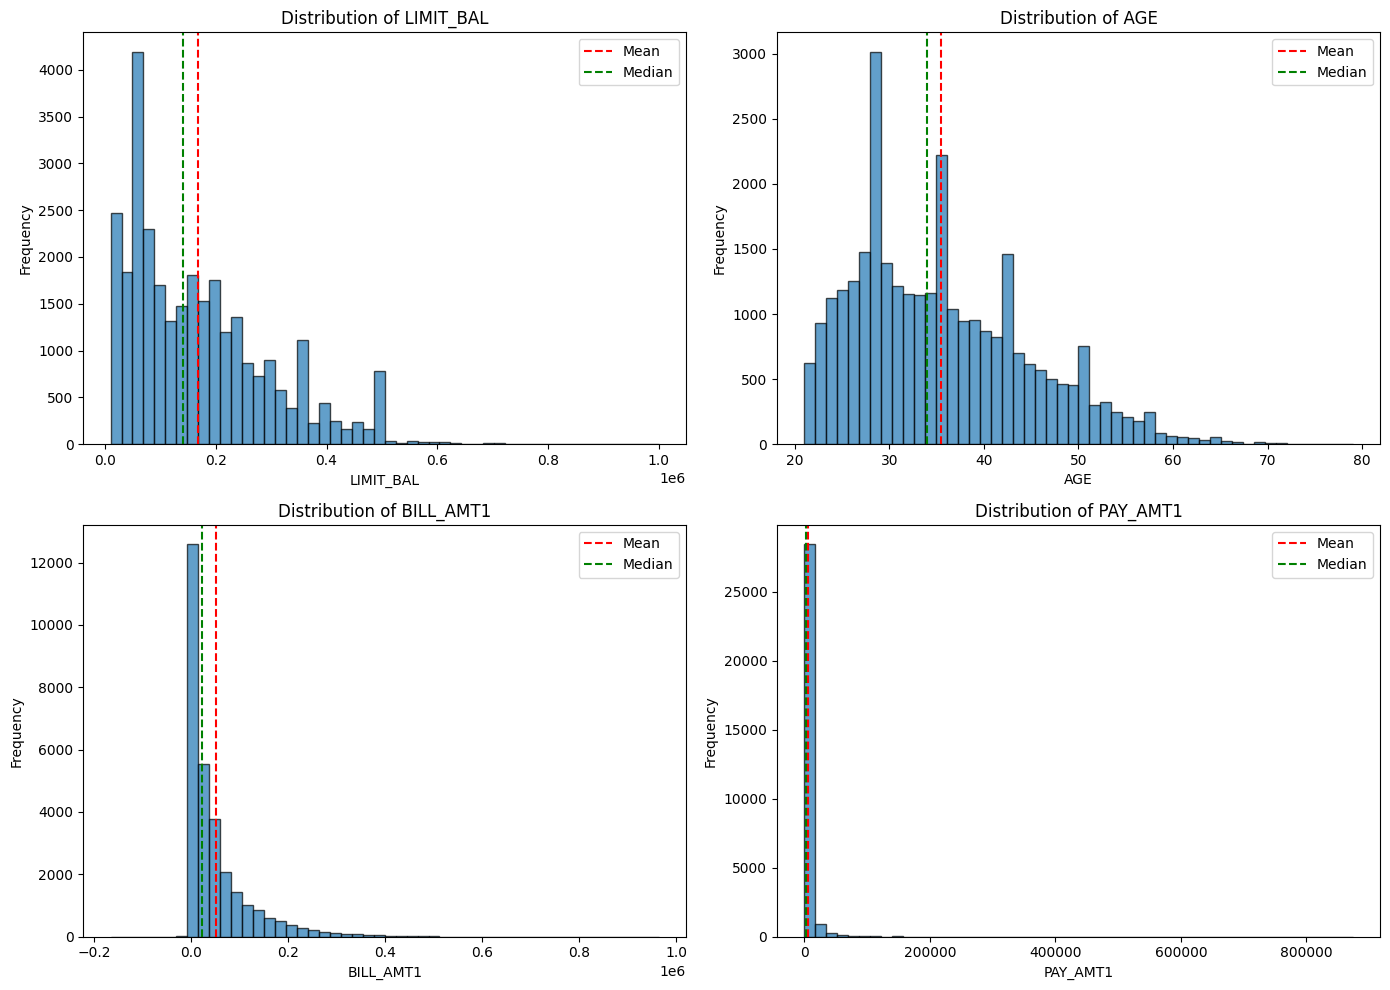

In [51]:
# Distribution of key numerical features
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(X[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(X[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].axvline(X[col].median(), color='green', linestyle='--', label='Median')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 4. Numerical Features Analysis

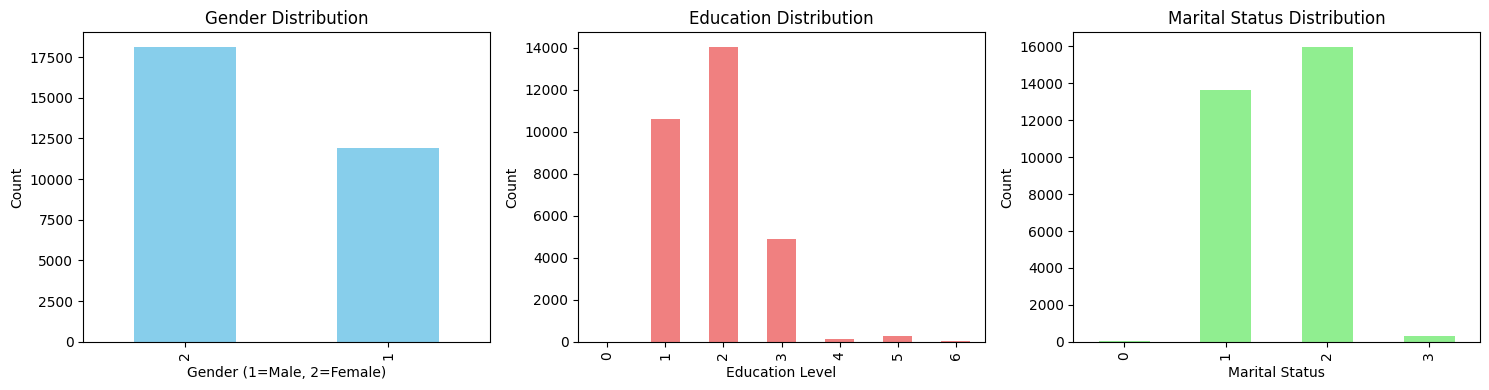

In [50]:
# Visualize categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# SEX
X['SEX'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender (1=Male, 2=Female)')
axes[0].set_ylabel('Count')

# EDUCATION
X['EDUCATION'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Education Distribution')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')

# MARRIAGE
X['MARRIAGE'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Marital Status Distribution')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [49]:
# Analyze categorical features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(X[col].value_counts().sort_index())
    print(f"\nUnique values in {col}: {X[col].unique()}")
    print("="*50)


SEX Distribution:
SEX
1    11888
2    18112
Name: count, dtype: int64

Unique values in SEX: [2 1]

EDUCATION Distribution:
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

Unique values in EDUCATION: [2 1 3 5 4 6 0]

MARRIAGE Distribution:
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

Unique values in MARRIAGE: [1 2 3 0]


## 3. Categorical Features Analysis

Target Variable Distribution:
Y
0    23364
1     6636
Name: count, dtype: int64

Percentage Distribution:
Y
0    77.88
1    22.12
Name: proportion, dtype: float64


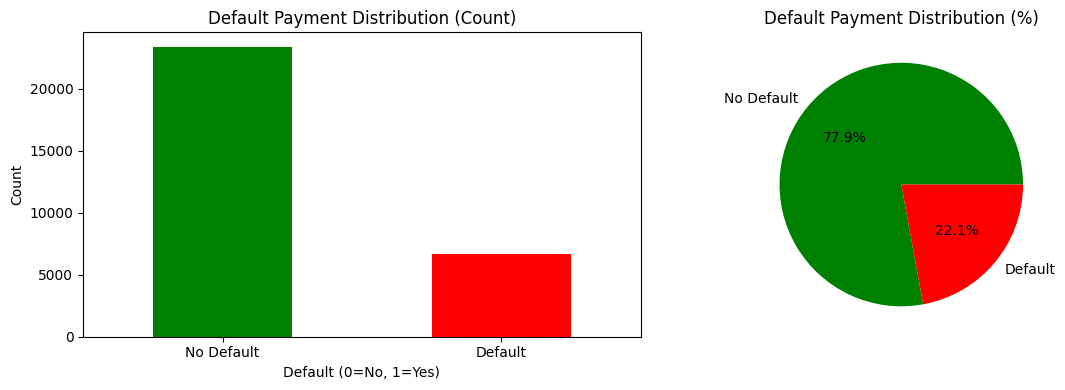


Class Imbalance Ratio: 3.5207956600361663


In [ ]:
# Distribution of target variable
print("Target Variable Distribution:")
print(y.value_counts())
print("\nPercentage Distribution:")
print(y.value_counts(normalize=True) * 100)

# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
y.value_counts().plot(kind="bar", ax=ax[0], color=["green", "red"])
ax[0].set_title("Default Payment Distribution (Count)")
ax[0].set_xlabel("Default (0=No, 1=Yes)")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(["No Default", "Default"], rotation=0)

# Pie chart
y.value_counts().plot(
    kind="pie",
    ax=ax[1],
    autopct="%1.1f%%",
    labels=["No Default", "Default"],
    colors=["green", "red"],
)
ax[1].set_ylabel("")
ax[1].set_title("Default Payment Distribution (%)")

plt.tight_layout()
plt.show()

# Check for class imbalance
print("\n" + "=" * 50)
print("Class Imbalance Ratio:", y.value_counts()[0] / y.value_counts()[1])

## 2. Target Variable Analysis

In [46]:
# Check for missing values
print("Missing Values:")
print(X.isnull().sum())
print("\nTarget Variable Missing Values:")
print(y.isnull().sum())

# Check data types
print("\n" + "="*50)
print("Data Types:")
print(X.dtypes)

# Check for duplicates
print("\n" + "="*50)
print(f"Number of duplicate rows: {X.duplicated().sum()}")

Missing Values:
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

Target Variable Missing Values:
Y    0
dtype: int64

Data Types:
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

Number of duplicate rows: 56


## 1. Data Quality Assessment